In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', usecols=['Sales'])

In [3]:
print(data.shape)

data.head()

(36, 1)


,Sales
0,266.0
1,145.9
2,183.1
3,119.3
4,180.3


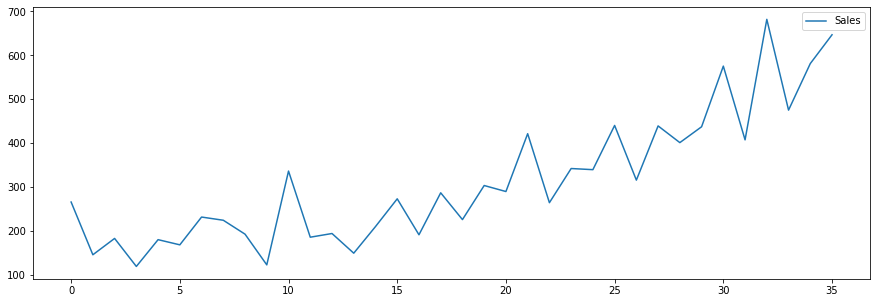

In [4]:
data.plot(figsize=(15,5));

### add some missing values

In [5]:
data_missing = data.copy()

random_index = np.random.randint(0, len(data)-1, int(len(data)*0.1))

data_missing.iloc[random_index] = np.nan

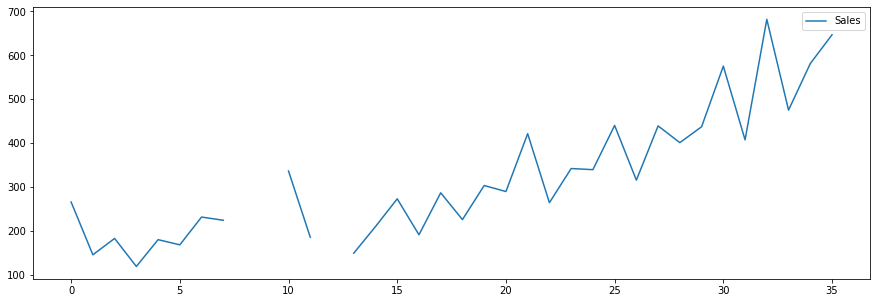

In [6]:
data_missing.plot(figsize=(15,5));

In [7]:
from imputer import InterpolationImputer

In [8]:
imputer1 = InterpolationImputer(method='linear')

data_transformed1 = imputer1.fit_transform(data_missing)

In [9]:
imputer2 = InterpolationImputer(method='quadratic')

data_transformed2 = imputer2.fit_transform(data_missing)

In [10]:
imputer3 = InterpolationImputer(method='cubic')

data_transformed3 = imputer3.fit_transform(data_missing)

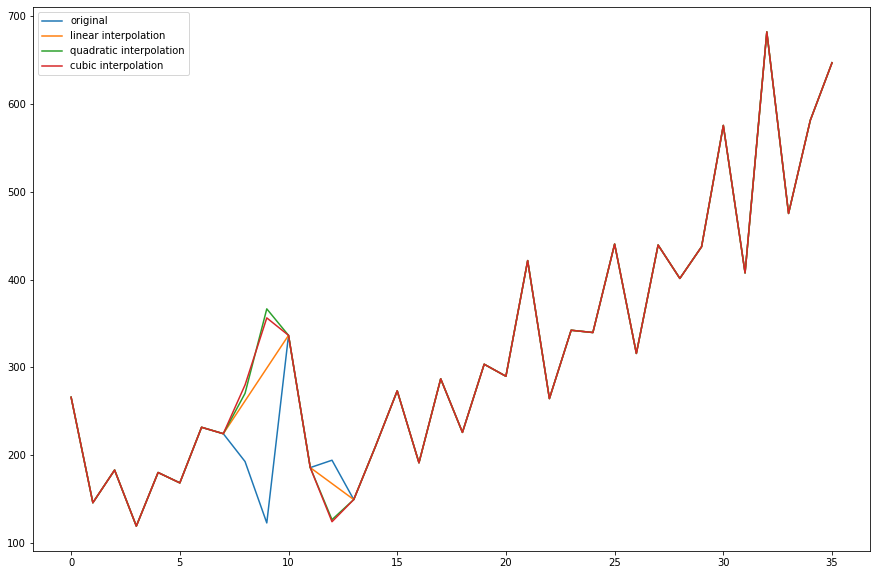

In [11]:
plt.figure(figsize=(15,10))
data['Sales'].plot(label='original')
data_transformed1['Sales'].plot(label='linear interpolation')
data_transformed2['Sales'].plot(label='quadratic interpolation')
data_transformed3['Sales'].plot(label='cubic interpolation')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error

df = pd.DataFrame({
    'original': data['Sales'],
    'linear': data_transformed1['Sales'],
    'quadratic': data_transformed2['Sales'],
    'cubic': data_transformed3['Sales'],
})

In [13]:
print(
    mean_squared_error(df['original'], df['linear'], squared=False),
    mean_squared_error(df['original'], df['quadratic'], squared=False),
    mean_squared_error(df['original'], df['cubic'], squared=False),
)

31.860415569275197 44.09754873235122 43.14309382095021
